## E-Commerce EDA

**Import needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Please ignore this process, it is for local filing**

In [2]:
import os
os.chdir(r"C:\Users\iiven\Ai-Cursor\Neural Network Foundation")


In [7]:
os.getcwd()


'C:\\Users\\iiven\\Ai-Cursor\\Neural Network Foundation'

**Reading Data**

In [13]:
df = pd.read_csv("Data/E-Commerce.csv", encoding="ISO-8859-1")
# encoding is used to avoid any encoding issues (suggested by Cursor)


In [15]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Duplicates and NaN values check**

In [18]:
print(df.duplicated().sum())


5268


**Duplicated columns are bad to feed your model so it should be droped**

In [19]:
df.drop_duplicates(inplace=True)


In [20]:
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

**CustomerID column is not important so it can be dropped as a column**

In [22]:
df.drop(columns=["CustomerID"], inplace=True)


In [23]:
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,United Kingdom


In [24]:
df.shape[0]

536641

In [28]:
print(df['Description'].isna().mean() * 100)


0.2709446352403189


**NaN values in Description is bad for model and we can safely drop them because the data is big enough**

In [29]:
df.dropna(subset=["Description"], inplace=True)


In [30]:
df.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [31]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country'],
      dtype='object')

**Features like InvoiceNo, StockCode and InvoiceDate are not important so it can be safely removed**

In [32]:
cols_to_drop = ["InvoiceNo", "StockCode", "InvoiceDate"]
df.drop(columns=cols_to_drop, inplace=True)


In [33]:
df.head(10)


,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,WHITE METAL LANTERN,6,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom
7,HAND WARMER UNION JACK,6,1.85,United Kingdom
8,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,United Kingdom


## EDA

**First we analyse Description column**

In [34]:
df['Description'].nunique()


4223

In [38]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
LIGHT DECORATION BATTERY OPERATED        1
RUBY GLASS CLUSTER NECKLACE              1
ANT SILVER TURQUOISE BOUDICCA RING       1
water damaged                            1
SET 10 CARDS SNOWY ROBIN 17099           1
Name: count, Length: 4223, dtype: int64

In [37]:
(df['Description'].value_counts() > 1000).sum()


np.int64(37)

**I will make a pie chart for the top 10 frequently ordered food**

In [42]:
top_15_food = df['Description'].value_counts().head(15)


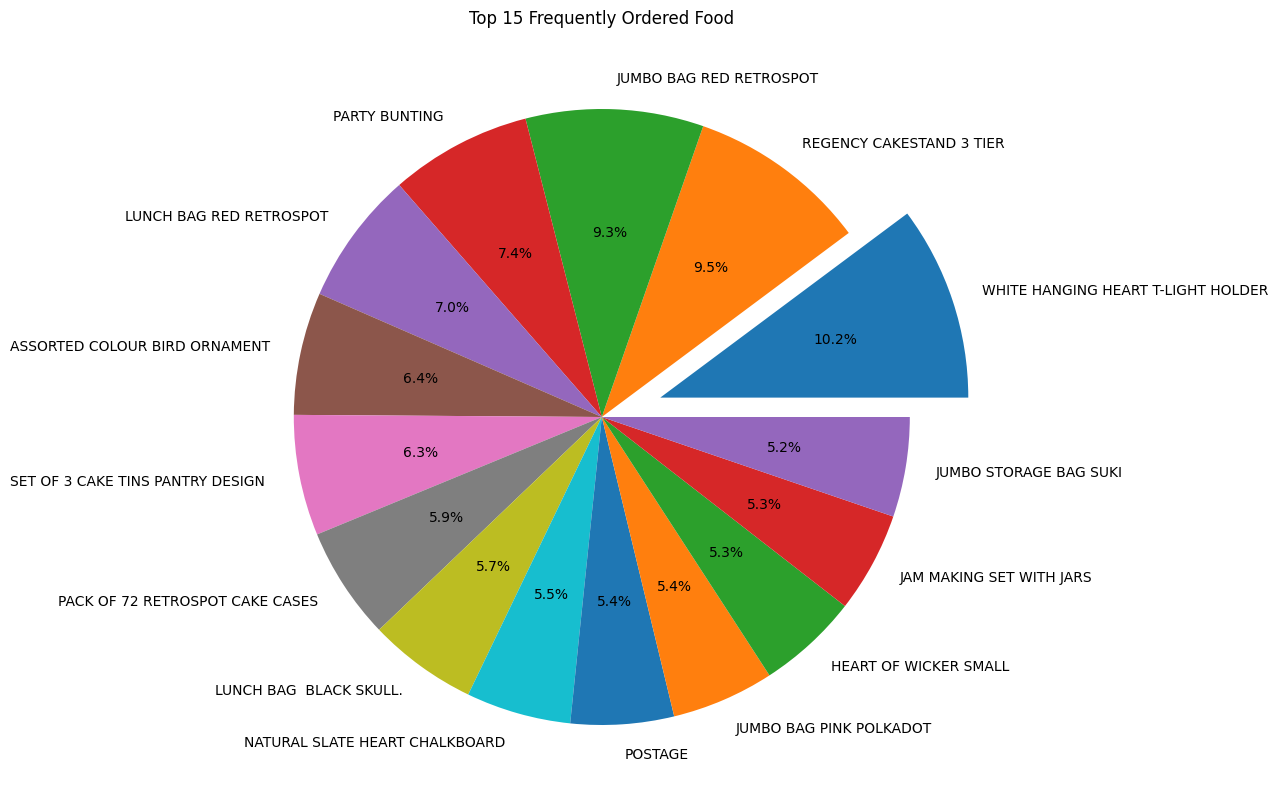

In [48]:
plt.figure(figsize=(15, 10))
plt.pie(top_15_food, autopct='%1.1f%%', labels=top_15_food.index, explode=[0.2 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.title("Top 15 Frequently Ordered Food")
plt.show()




**We can see that the most oredered item is WHITE HANGING HEART T-LIGHT HOLDER**

**This is the picture from the internet**

![Pic](https://m.media-amazon.com/images/I/615AibHrRDL._AC_SX679_.jpg)


**Quantity column**

In [49]:
df['Quantity'].describe()


count    535187.000000
mean          9.671593
std         219.059056
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

**The min is really negative number and the third quartile is 10 with the max being a really big number**<br>
**Data definately contains outliers**

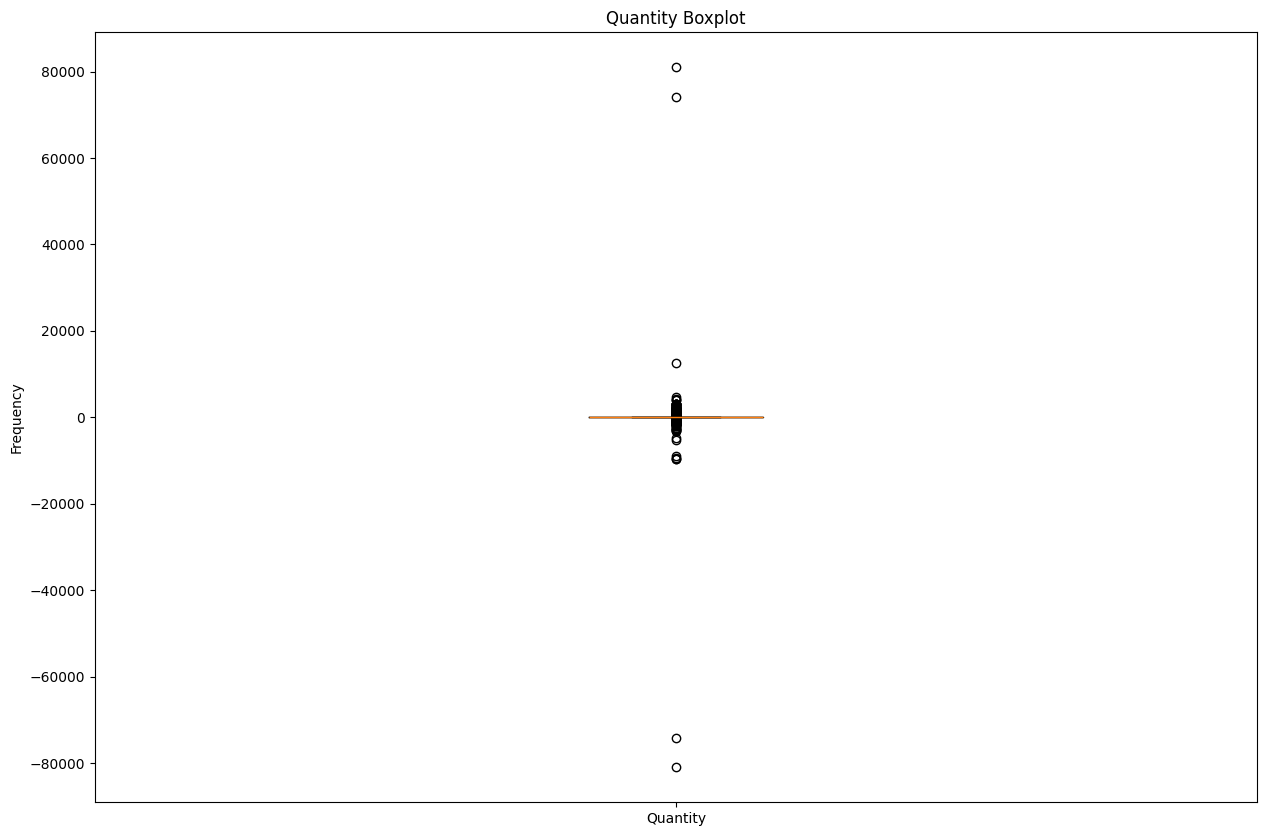

In [59]:
plt.figure(figsize=(15, 10))
plt.boxplot(df['Quantity'])
plt.title("Quantity Boxplot")
plt.ylabel("Frequency")
plt.xticks([1], ["Quantity"])
plt.show()


**Outliers in this data is really bad and will take some work to handle**

In [63]:
# let's compute IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# let's compute the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

IQR, lower_bound, upper_bound


(np.float64(9.0), np.float64(-12.5), np.float64(23.5))

In [66]:
# outliers
quantity_outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

In [67]:
quantity_outliers.shape[0]

57849

In [65]:
df.shape[0]


535187

In [68]:
quantity_outliers.shape[0] / df.shape[0] * 100


10.809119055582443

**We definately should remove those outliers**

In [69]:
cleaned_df = df[~((df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound))]


In [70]:
cleaned_df.shape[0]


477338

In [71]:
df.shape[0] - quantity_outliers.shape[0]

477338

**Outliers are removed correctly**

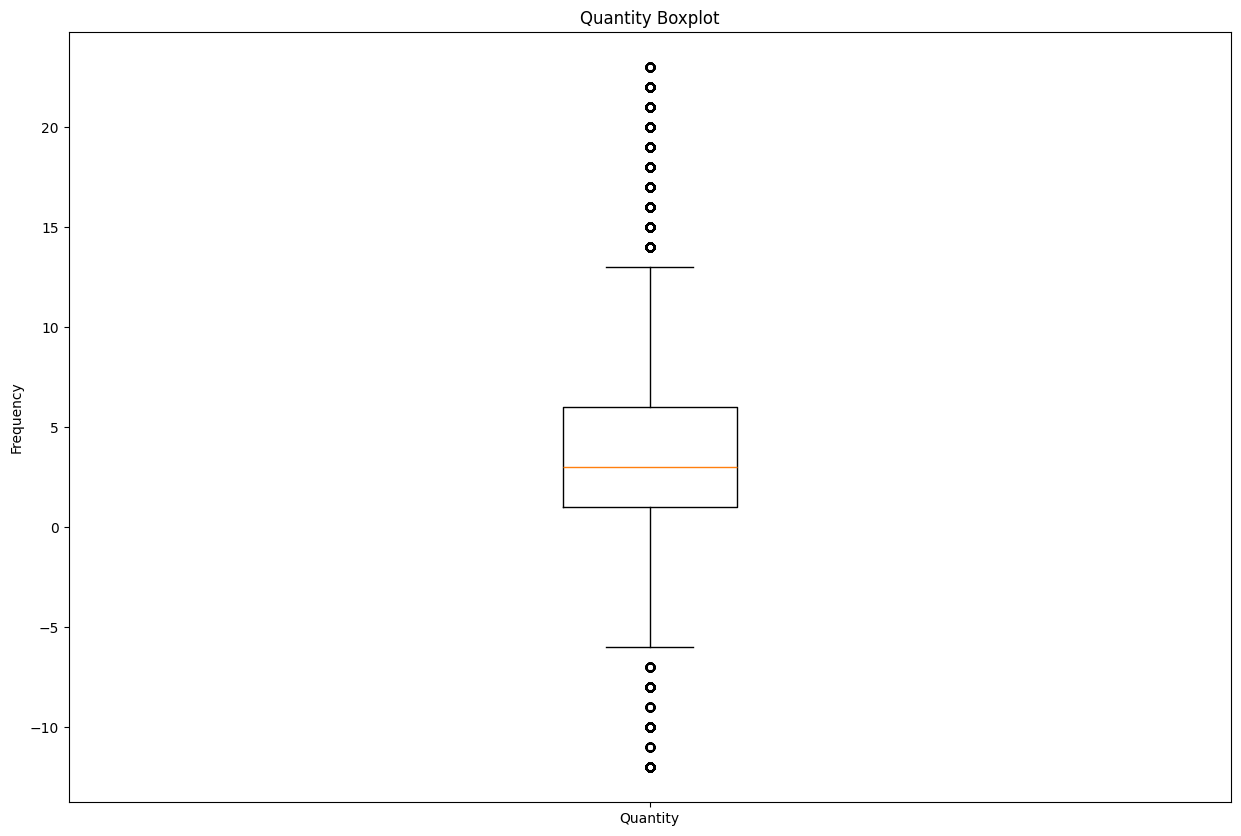

In [72]:
plt.figure(figsize=(15, 10))
plt.boxplot(cleaned_df['Quantity'])
plt.title("Quantity Boxplot")
plt.ylabel("Frequency")
plt.xticks([1], ["Quantity"])
plt.show()



**The outliers shown is an error with calculation of python not the actual formula**

In [82]:
len(cleaned_df[cleaned_df['Quantity'] < 0])

8239

**We can just make these numbers positive**

In [83]:
cleaned_df['Quantity'] = cleaned_df['Quantity'].abs()


C:\Users\iiven\AppData\Local\Temp\ipykernel_23464\3995814556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Quantity'] = cleaned_df['Quantity'].abs()


In [84]:
len(cleaned_df[cleaned_df['Quantity'] < 0])

0

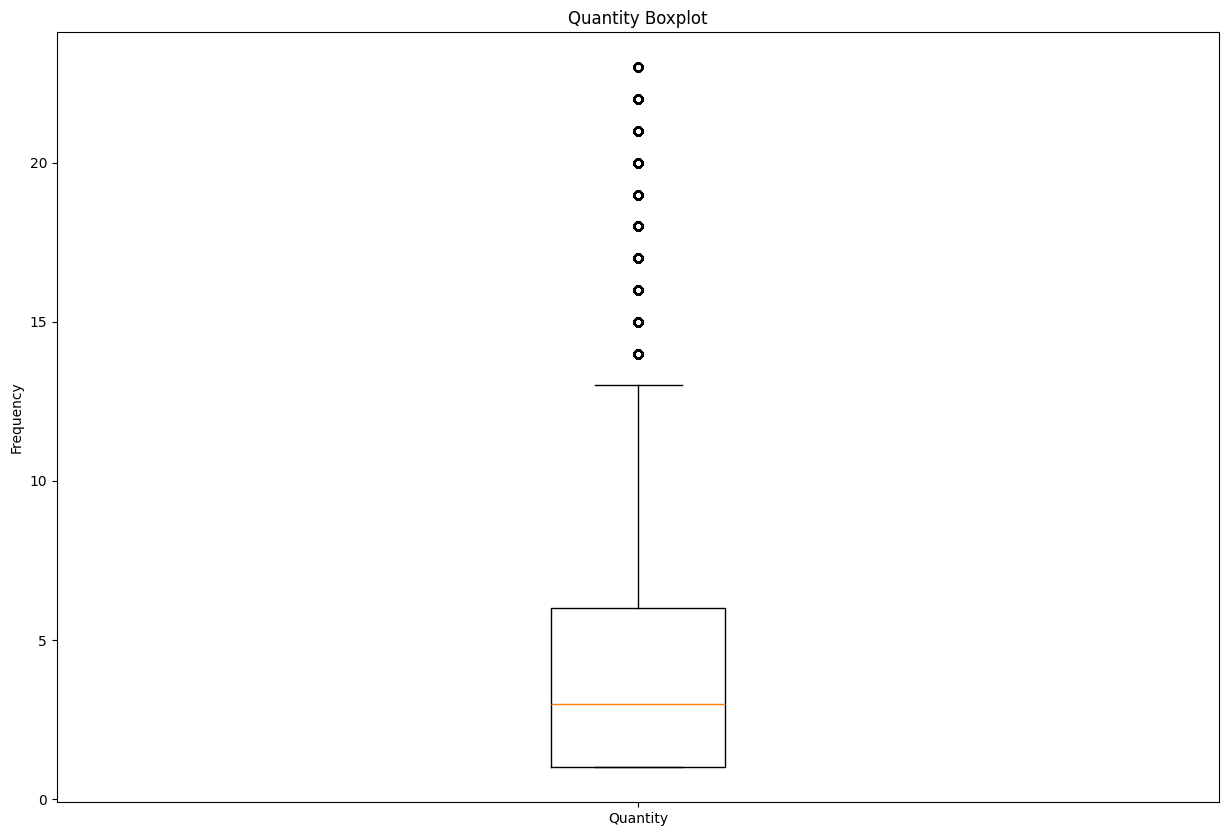

In [85]:
plt.figure(figsize=(15, 10))
plt.boxplot(cleaned_df['Quantity'])
plt.title("Quantity Boxplot")
plt.ylabel("Frequency")
plt.xticks([1], ["Quantity"])
plt.show()



**UnitPrice column**

In [86]:
cleaned_df['UnitPrice'].describe()


count    477338.000000
mean          5.049509
std         103.083146
min      -11062.060000
25%           1.250000
50%           2.460000
75%           4.210000
max       38970.000000
Name: UnitPrice, dtype: float64

**Again we see outliers**

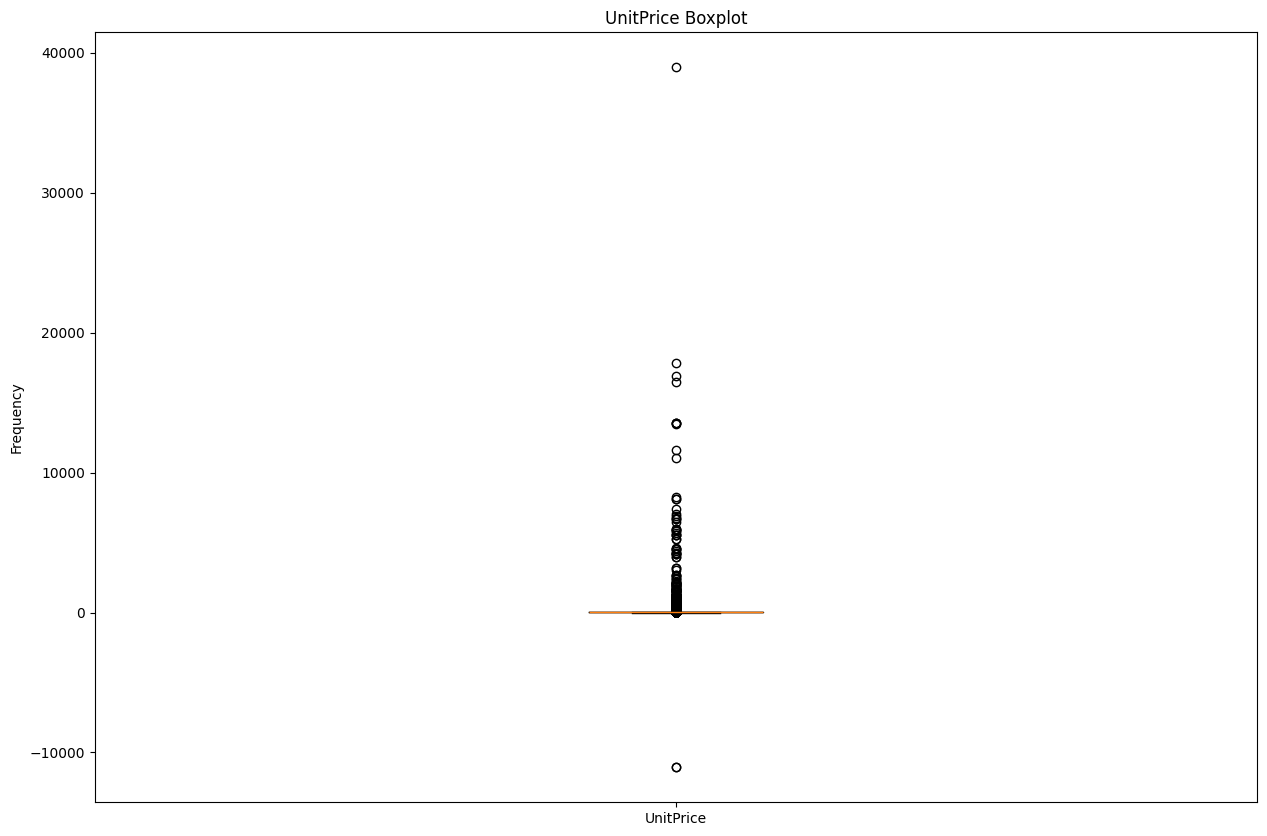

In [87]:
plt.figure(figsize=(15, 10))
plt.boxplot(cleaned_df['UnitPrice'])
plt.title("UnitPrice Boxplot")
plt.ylabel("Frequency")
plt.xticks([1], ["UnitPrice"])
plt.show()



In [88]:
Q1 = cleaned_df['UnitPrice'].quantile(0.25)
Q3 = cleaned_df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

IQR, lower_bound, upper_bound


(np.float64(2.96),
 np.float64(-3.1899999999999995),
 np.float64(8.649999999999999))

In [89]:
price_outliers = cleaned_df[(cleaned_df['UnitPrice'] < lower_bound) | (cleaned_df['UnitPrice'] > upper_bound)]


In [90]:
price_outliers.shape[0]


32348

**Again we will remove outliers**

In [91]:
cleaned_df2 = cleaned_df[~((cleaned_df['UnitPrice'] < lower_bound) | (cleaned_df['UnitPrice'] > upper_bound))]


In [92]:
cleaned_df2.shape[0]


444990

In [94]:
len(cleaned_df2[cleaned_df2['UnitPrice'] < 0])


0

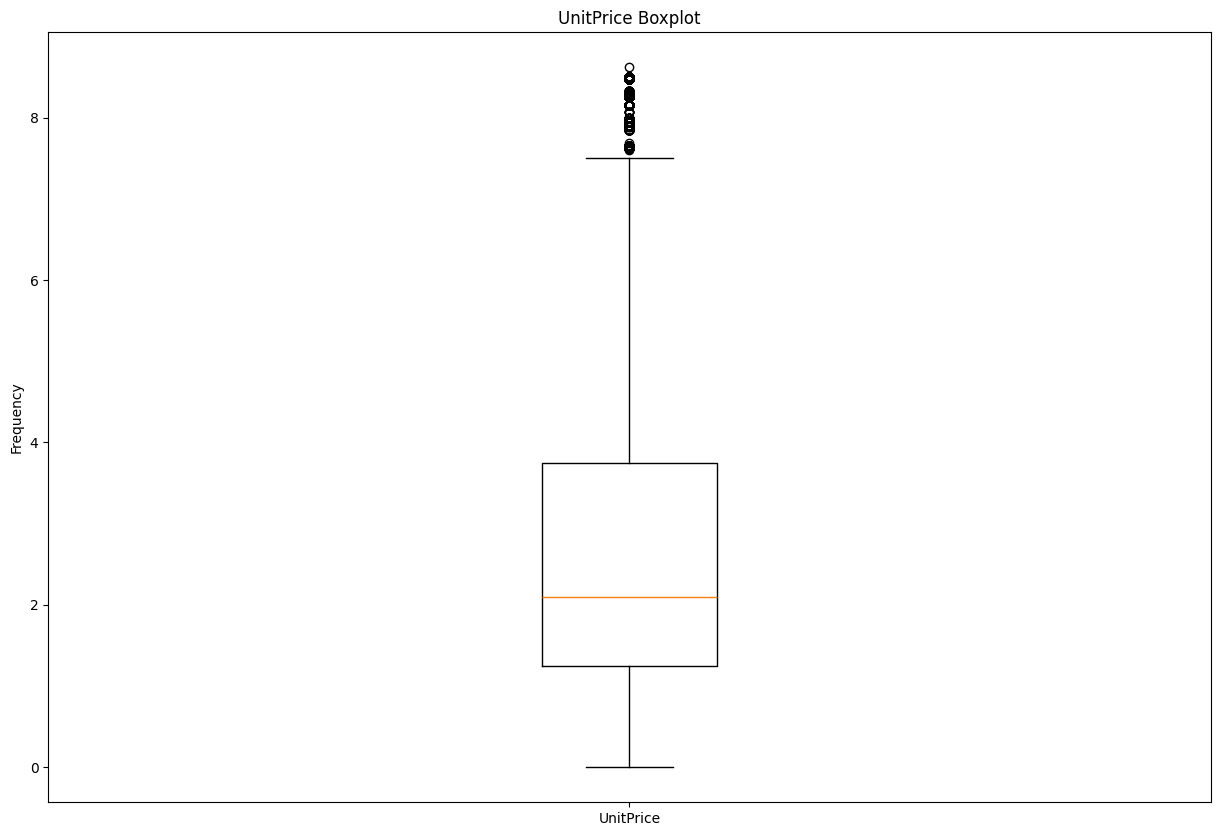

In [96]:
plt.figure(figsize=(15, 10))
plt.boxplot(cleaned_df2['UnitPrice'])
plt.title("UnitPrice Boxplot")
plt.ylabel("Frequency")
plt.xticks([1], ["UnitPrice"])
plt.show()



**We are good now**

**Country column**

In [100]:
cleaned_df2['Country'].nunique()


38

In [101]:
cleaned_df2['Country'].value_counts()


Country
United Kingdom          412540
Germany                   7185
France                    6458
EIRE                      5795
Spain                     1937
Belgium                   1594
Switzerland               1405
Portugal                  1234
Norway                     692
Italy                      639
Channel Islands            559
Australia                  541
Netherlands                529
Cyprus                     486
Finland                    484
Unspecified                367
Austria                    322
Poland                     267
USA                        216
Denmark                    211
Sweden                     203
Israel                     189
Hong Kong                  173
Iceland                    141
Singapore                  127
Greece                     121
Japan                      115
Canada                     106
Malta                       97
RSA                         51
United Arab Emirates        49
European Community          47


In [107]:
cleaned_df2['Country'].value_counts().values

array([412540,   7185,   6458,   5795,   1937,   1594,   1405,   1234,
          692,    639,    559,    541,    529,    486,    484,    367,
          322,    267,    216,    211,    203,    189,    173,    141,
          127,    121,    115,    106,     97,     51,     49,     47,
           36,     24,     23,     10,     10,      7])

In [117]:
threshold = 1500
dummy_df = cleaned_df2['Country'].value_counts()
major_countries = dummy_df[dummy_df >= threshold]

other = dummy_df[dummy_df < threshold].sum()

final = major_countries.copy()
final["other"] = other


In [118]:
final

Country
United Kingdom    412540
Germany             7185
France              6458
EIRE                5795
Spain               1937
Belgium             1594
other               9481
Name: count, dtype: int64

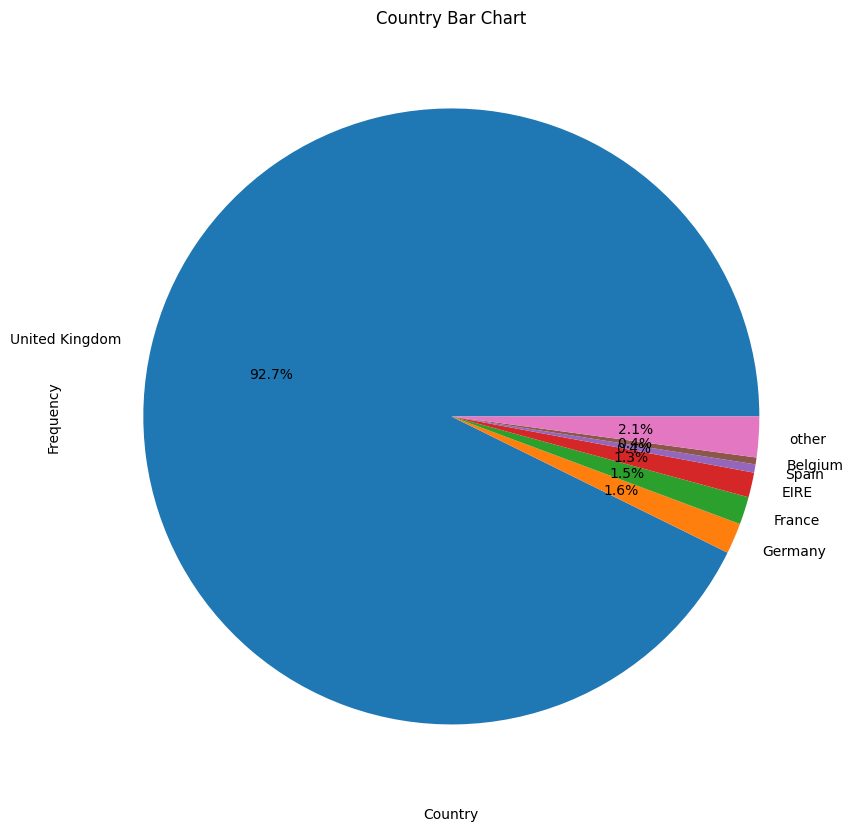

In [119]:
plt.figure(figsize=(15, 10))
plt.pie(final, autopct='%1.1f%%', labels=final.index)
plt.title("Country Bar Chart")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()



**Most of the orders are from United Kingdom**

In [120]:
final_df = cleaned_df2.copy()


In [121]:
final_df.shape

(444990, 4)

In [122]:
final_df.head(10)

,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,WHITE METAL LANTERN,6,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom
7,HAND WARMER UNION JACK,6,1.85,United Kingdom
8,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom
10,POPPY'S PLAYHOUSE BEDROOM,6,2.10,United Kingdom


**What is the Description of the max UnitPrice**

In [124]:
final_df.loc[final_df['UnitPrice'].idxmax()]


Description           POSTAGE
Quantity                    1
UnitPrice                8.62
Country        United Kingdom
Name: 116698, dtype: object

**Postage is a fees charge and it is the most expensive thing in the data**

**Getting the most expensive order made**

In [127]:
final_df['TotalPrice'] = final_df['UnitPrice'] * final_df['Quantity']


In [130]:
final_df[final_df['TotalPrice'] == final_df['TotalPrice'].max()]

,Description,Quantity,UnitPrice,Country,TotalPrice
16147,WHITE SKULL HOT WATER BOTTLE,23,8.47,United Kingdom,194.81
25061,WOODEN FRAME ANTIQUE WHITE,23,8.47,United Kingdom,194.81


**WHITE SKULL HOT WATER BOTTLE**

![WHITE SKULL HOT WATER BOTTLE](https://i.etsystatic.com/11429385/r/il/2f5b26/6000619186/il_fullxfull.6000619186_f0ke.jpg)

**People like to buy strange things**

**WOODEN FRAME ANTIQUE WHITE**

![WOODEN FRAME ANTIQUE WHITE](https://www.shopferme.com/cdn/shop/files/wooden-carved-white-photo-frame-front-ferme-08_31150c7d-2db3-46a8-ab17-9d21b08d1357.jpg?v=1696588333)

**This is a good thing to buy for personal pictures**

**Gettings the largest quantity ordered**

In [131]:
final_df[final_df['Quantity'] == final_df['Quantity'].max()]


,Description,Quantity,UnitPrice,Country,TotalPrice
106,RETROSPOT TEA SET CERAMIC 11 PC,23,4.25,United Kingdom,97.75
1901,CHRISTMAS TOILET ROLL,23,2.51,United Kingdom,57.73
10275,CHRISTMAS TOILET ROLL,23,2.51,United Kingdom,57.73
10355,CHRISTMAS TREE HEART DECORATION,23,0.43,United Kingdom,9.89
10920,CHRISTMAS RETROSPOT ANGEL WOOD,23,1.66,United Kingdom,38.18
...,...,...,...,...,...
507804,JUMBO BAG VINTAGE CHRISTMAS,23,2.46,United Kingdom,56.58
509021,LUNCH BAG RED RETROSPOT,23,4.96,United Kingdom,114.08
523679,PACK OF 72 RETROSPOT CAKE CASES,23,2.08,United Kingdom,47.84
528035,BOX OF 24 COCKTAIL PARASOLS,23,0.83,United Kingdom,19.09


In [132]:
len(final_df[final_df['Quantity'] == final_df['Quantity'].max()])

104

**104 orders of 23 quantities**

**Getting the top 10 most ordered items**

In [141]:
final_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


Description
JUMBO BAG RED RETROSPOT               14164
WHITE HANGING HEART T-LIGHT HOLDER    11018
ASSORTED COLOUR BIRD ORNAMENT         10995
LUNCH BAG RED RETROSPOT               10622
LUNCH BAG  BLACK SKULL.                8223
LUNCH BAG CARS BLUE                    7956
JAM MAKING SET PRINTED                 7702
JUMBO BAG PINK POLKADOT                7472
LUNCH BAG APPLE DESIGN                 7436
LUNCH BAG SPACEBOY DESIGN              7324
Name: Quantity, dtype: int64

**JUMBO BAG RED RETROSPOT**

![JUMBO BAG RED RETROSPOT](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSo-oyfrbSe2doY-SieDhLiUGMS2KwjzHfbfw&s)

**This bag is suitable for presents; no wonder it is the most ordered.**

**We will get a correlation map for these columns**

**I will encode the categorical columns**<br>
**Description column will be encoded with BERT embedding because it is a text data**<br>
**Country will be encoded with LabelEncoder**

In [142]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


c:\Users\iiven\miniconda3\envs\Ai\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\iiven\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download

In [143]:
description = final_df['Description'].astype(str).to_list()

In [153]:
description

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 "POPPY'S PLAYHOUSE BEDROOM ",
 "POPPY'S PLAYHOUSE KITCHEN",
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY ',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'BOX OF VINTAGE JIGSAW BLOCKS ',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'RECIPE BOX WITH METAL HEART',
 'DOORMAT NEW ENGLAND',
 'JAM MAKING SET WITH JARS',
 'RED COAT RACK PARIS FASHION',
 'YELLOW COAT RACK PARIS FASHION',
 'BLUE COAT RACK PARIS FASHION',
 'BATH BUILDING BLOCK WORD',
 'ALARM CLOCK BAKELIKE GREEN',
 'PANDA AND BUNNIES STICKER SHEET',
 'SET/2 RED RETROSPOT TEA TOWELS ',
 'CHARLOTTE BAG DOLLY GIRL DESIGN',
 'VINTAGE SEASIDE JIGSAW PUZZLES',
 'HAND WARMER RED POLKA DOT',
 'HAND WARMER UNION JAC

In [149]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [150]:
model.eval()
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [161]:
from tqdm import tqdm

def encode_batch_with_progress(texts, batch_size=64):
    all_embeddings = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=50)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        embeddings = outputs.last_hidden_state.mean(dim=1)
        all_embeddings.append(embeddings.cpu())

    return torch.cat(all_embeddings).numpy()



In [162]:
embedded_list = encode_batch_with_progress(description, batch_size=64)

  0%|          | 0/6953 [00:00<?, ?it/s]

100%|██████████| 6953/6953 [06:05<00:00, 19.01it/s]


In [163]:
embedded_list

array([[ 0.51657015, -0.22835104, -0.21700491, ...,  0.0260112 ,
        -0.22481956, -0.40088144],
       [ 0.11888622,  0.08073001, -0.3610544 , ...,  0.04127744,
         0.06188593,  0.01513435],
       [-0.01617578, -0.37784174,  0.3249077 , ..., -0.08035561,
        -0.1364067 , -0.15564895],
       ...,
       [ 0.11265852, -0.04419464,  0.04499143, ..., -0.10868813,
         0.09193849, -0.44006786],
       [ 0.25742558,  0.00796375,  0.04746373, ...,  0.05476691,
         0.09787294, -0.24127717],
       [ 0.10225587,  0.11473785,  0.04573229, ...,  0.01495004,
        -0.08081717, -0.26455718]], dtype=float32)

In [164]:
embedded_list[0]

array([ 5.16570151e-01, -2.28351042e-01, -2.17004910e-01, -4.52429429e-02,
        4.35184449e-01,  1.91391885e-01, -1.23955213e-01,  1.98702514e-01,
        1.67046919e-01, -1.88795209e-01,  2.89968520e-01, -3.87685001e-01,
       -3.01766008e-01,  4.98528630e-01, -3.01169217e-01,  3.72450590e-01,
       -1.75509334e-01,  3.67491692e-01, -3.27193700e-02,  1.31447196e-01,
        2.21618548e-01, -2.80262567e-02, -2.72267580e-01,  3.31804991e-01,
        4.91814286e-01,  5.16829491e-01, -8.24290887e-02, -3.01726046e-03,
        1.73645869e-01,  1.60744146e-01,  3.15512419e-01,  3.42091054e-01,
        2.89095461e-01, -1.55878663e-01,  2.08523870e-02, -4.48272765e-01,
       -8.21593925e-02, -5.26915848e-01, -2.73627728e-01,  6.45099133e-02,
       -2.49806762e-01, -3.62146884e-01,  2.57996261e-01, -1.51698917e-01,
        2.57114209e-02, -3.57681513e-01, -1.74832016e-01, -1.70264784e-02,
       -3.12464565e-01,  5.00531867e-02, -1.47034198e-01, -7.14019910e-02,
       -3.33437562e-01,  

In [165]:
len(embedded_list)

444990

In [166]:
len(embedded_list[0])

768

In [167]:
embedded_array = np.vstack(embedded_list)

In [168]:
embedded_array

array([[ 0.51657015, -0.22835104, -0.21700491, ...,  0.0260112 ,
        -0.22481956, -0.40088144],
       [ 0.11888622,  0.08073001, -0.3610544 , ...,  0.04127744,
         0.06188593,  0.01513435],
       [-0.01617578, -0.37784174,  0.3249077 , ..., -0.08035561,
        -0.1364067 , -0.15564895],
       ...,
       [ 0.11265852, -0.04419464,  0.04499143, ..., -0.10868813,
         0.09193849, -0.44006786],
       [ 0.25742558,  0.00796375,  0.04746373, ...,  0.05476691,
         0.09787294, -0.24127717],
       [ 0.10225587,  0.11473785,  0.04573229, ...,  0.01495004,
        -0.08081717, -0.26455718]], dtype=float32)

In [169]:
embedded_array[0]

array([ 5.16570151e-01, -2.28351042e-01, -2.17004910e-01, -4.52429429e-02,
        4.35184449e-01,  1.91391885e-01, -1.23955213e-01,  1.98702514e-01,
        1.67046919e-01, -1.88795209e-01,  2.89968520e-01, -3.87685001e-01,
       -3.01766008e-01,  4.98528630e-01, -3.01169217e-01,  3.72450590e-01,
       -1.75509334e-01,  3.67491692e-01, -3.27193700e-02,  1.31447196e-01,
        2.21618548e-01, -2.80262567e-02, -2.72267580e-01,  3.31804991e-01,
        4.91814286e-01,  5.16829491e-01, -8.24290887e-02, -3.01726046e-03,
        1.73645869e-01,  1.60744146e-01,  3.15512419e-01,  3.42091054e-01,
        2.89095461e-01, -1.55878663e-01,  2.08523870e-02, -4.48272765e-01,
       -8.21593925e-02, -5.26915848e-01, -2.73627728e-01,  6.45099133e-02,
       -2.49806762e-01, -3.62146884e-01,  2.57996261e-01, -1.51698917e-01,
        2.57114209e-02, -3.57681513e-01, -1.74832016e-01, -1.70264784e-02,
       -3.12464565e-01,  5.00531867e-02, -1.47034198e-01, -7.14019910e-02,
       -3.33437562e-01,  

In [170]:
embedded_array.shape

(444990, 768)

**We need to use PCA to reduce dimensionality**

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 1-dimension to simply see the correlation
pca_result = pca.fit_transform(embedded_array)

In [176]:
pca_result.shape

(444990, 1)

In [177]:
pca_result

array([[ 2.4462774],
       [-1.7118325],
       [ 2.1913204],
       ...,
       [ 1.2313087],
       [ 2.1554954],
       [ 1.1218121]], dtype=float32)

In [ ]:
pca_result = pca_result.reshape(-1,)

**Encoding Country column**

In [184]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_df['Country'] = le.fit_transform(final_df['Country'])

In [185]:
final_df.head()

,Description,Quantity,UnitPrice,Country,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,36,15.30
1,WHITE METAL LANTERN,6,3.39,36,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,36,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,36,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,36,20.34


In [186]:
final_df['description_pca'] = pca_result

In [187]:
final_df

,Description,Quantity,UnitPrice,Country,TotalPrice,description_pca
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,36,15.30,2.446277
1,WHITE METAL LANTERN,6,3.39,36,20.34,-1.711833
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,36,22.00,2.191320
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,36,20.34,2.692801
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,36,20.34,1.917524
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,13,10.20,1.777542
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,13,12.60,1.624916
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,13,16.60,1.231309
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,13,16.60,2.155495


In [188]:
final_df.isna().sum()

Description        0
Quantity           0
UnitPrice          0
Country            0
TotalPrice         0
description_pca    0
dtype: int64

In [189]:
df_tocorr = final_df.loc[::, ['Quantity', 'UnitPrice', 'Country', 'description_pca']]

In [190]:
df_tocorr

,Quantity,UnitPrice,Country,description_pca
0,6,2.55,36,2.446277
1,6,3.39,36,-1.711833
2,8,2.75,36,2.191320
3,6,3.39,36,2.692801
4,6,3.39,36,1.917524
...,...,...,...,...
541904,12,0.85,13,1.777542
541905,6,2.10,13,1.624916
541906,4,4.15,13,1.231309
541907,4,4.15,13,2.155495


In [191]:
corr = df_tocorr.corr()

In [192]:
corr

,Quantity,UnitPrice,Country,description_pca
Quantity,1.000000,-0.297517,-0.195144,0.009132
UnitPrice,-0.297517,1.000000,-0.003627,-0.005157
Country,-0.195144,-0.003627,1.000000,0.003807
description_pca,0.009132,-0.005157,0.003807,1.000000


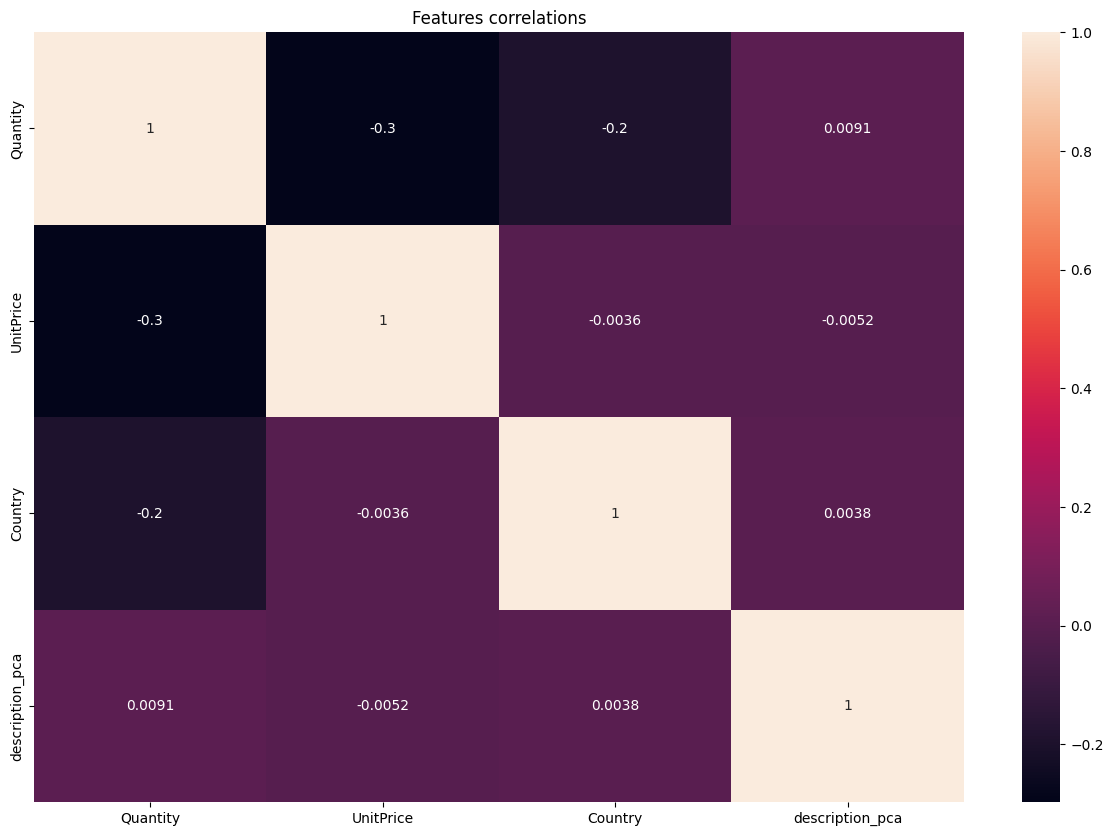

In [194]:
plt.figure(figsize=(15, 10))

sns.heatmap(corr, annot=True)
plt.title('Features correlations')
plt.show()

**From the heatmap we see that the description doesn't affect much but thats because we reduced to only 1 dimension which is not the best to do**

## Key insights

- This data shows different orders sales
- The most ordered quantity is 23
- Important features for the models are Description, UnitPrice, Country and Quantity
- The data had a lot of outliers and duplicates all have been handled ready for the preprocess

In [197]:
final_df = final_df.drop(['TotalPrice', 'description_pca'], axis= 1)

In [198]:
final_df.head()

,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,36
1,WHITE METAL LANTERN,6,3.39,36
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,36
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,36
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,36


In [199]:
final_df['Country'] = le.inverse_transform(final_df['Country'])

In [200]:
final_df

,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,WHITE METAL LANTERN,6,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom
...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France


In [201]:
os.getcwd()

'C:\\Users\\iiven\\Ai-Cursor\\Neural Network Foundation'

In [203]:
final_df.to_csv('Data/before_preprocess_ecommerce.csv', index= False)